In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from numpy import split
import plotly.express as px
from datetime import datetime
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA


#set for the dataset display for max row and column shown for 2000 and if we want any missing data choose none
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 2000)

#set seaborn style into dark mode
sns.set_style('dark')
# to display visuals in the notebook
%matplotlib inline

In [51]:
#load dataset
data = pd.read_csv('Nordpool.csv')
data.tail(5)

,01/01/2018,Unnamed: 1,Hours,2018,2019,2020,2021,2022
8755,31/12/2018 19:00,31/12/2018 20:00,8756,76.97,39.07,71.30,197.63,NaN
8756,31/12/2018 20:00,31/12/2018 21:00,8757,53.80,37.71,61.04,183.8,NaN
8757,31/12/2018 21:00,31/12/2018 22:00,8758,51.80,34.22,60.39,149.96,NaN
8758,31/12/2018 22:00,31/12/2018 23:00,8759,47.32,32.75,57.96,167.37,NaN
8759,31/12/2018 23:00,01/01/2019 00:00,8760,40.81,39.94,55.02,147.04,NaN


In [52]:
#to check data info.
data.info()
#check the data set for any nan
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   01/01/2018  8760 non-null   object 
 1   Unnamed: 1  8760 non-null   object 
 2   Hours       8760 non-null   int64  
 3   2018        8760 non-null   float64
 4   2019        8760 non-null   object 
 5   2020        8760 non-null   float64
 6   2021        8760 non-null   object 
 7   2022        5208 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 547.6+ KB


01/01/2018       0
Unnamed: 1       0
Hours            0
2018             0
2019             0
2020             0
2021             0
2022          3552
dtype: int64

From above we can see that our data set type are float64(2), int64(1), object(5) and the only missing value only for 2022 columns.

<AxesSubplot:>

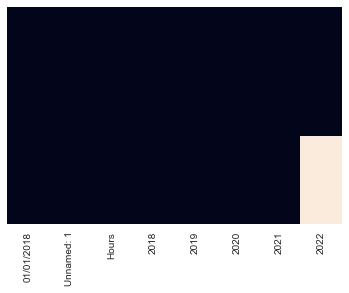

In [53]:
#check the number of missing values in each colum
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [54]:
#check the percentage of missing data for 2022 dataset
# percent of missing "2022" 
print('Percent of missing "2022" records is %.2f%%' %((data['2022'].isnull().sum()/data.shape[0])*100))

Percent of missing "2022" records is 40.55%


By using heatmap and percentage we can see clear that the missing data only for the date and hourly in the future (2022). for the rest data 0 missing values.

#CLEAN DATASET

In [55]:
#Drop the NaN Value
#Check the first dataset frame total
print(data.shape)
df = data.iloc[0:8760,:]
#Double check the dataset frame after we drop the NaN value
print(df.shape)

(8760, 8)
(8760, 8)


our data already clean and ready to explore

# Exploratory data analysis

In [56]:
#Change the coloumn name into more understandable to analyse
column_names = {"01/01/2018":"START",
                "Unnamed: 1":"END",
                "Hours":"TIME",
               }

df = df.rename(column_names, axis=1)
#check the dataset
df.tail(10)

,START,END,TIME,2018,2019,2020,2021,2022
8750,31/12/2018 14:00,31/12/2018 15:00,8751,56.90,36.09,65.60,159.92,NaN
8751,31/12/2018 15:00,31/12/2018 16:00,8752,54.00,37.21,62.09,171.07,NaN
8752,31/12/2018 16:00,31/12/2018 17:00,8753,58.77,53.35,57.54,121.58,NaN
8753,31/12/2018 17:00,31/12/2018 18:00,8754,79.00,55.1,76.00,169.53,NaN
8754,31/12/2018 18:00,31/12/2018 19:00,8755,90.00,45.6,106.50,229.04,NaN
8755,31/12/2018 19:00,31/12/2018 20:00,8756,76.97,39.07,71.30,197.63,NaN
8756,31/12/2018 20:00,31/12/2018 21:00,8757,53.80,37.71,61.04,183.8,NaN
8757,31/12/2018 21:00,31/12/2018 22:00,8758,51.80,34.22,60.39,149.96,NaN
8758,31/12/2018 22:00,31/12/2018 23:00,8759,47.32,32.75,57.96,167.37,NaN
8759,31/12/2018 23:00,01/01/2019 00:00,8760,40.81,39.94,55.02,147.04,NaN


In [57]:
#to separate date and time for start time
df['START'] = pd.to_datetime(df.START, format='%d/%m/%Y %H:%M')
df['start_date'] = df['START'].dt.date
df['start_time'] = df['START'].dt.time

#to separate date and time for finished time
df['END'] = pd.to_datetime(df.END, format='%d/%m/%Y %H:%M')
df['end_date'] = df['END'].dt.date
df['end_time'] = df['END'].dt.time

print (df)


                   START                 END  TIME   2018   2019   2020    2021    2022  start_date start_time    end_date  end_time
0    2018-01-01 00:00:00 2018-01-01 01:00:00     1  42.94  60.12  39.94   61.45  115.95  2018-01-01   00:00:00  2018-01-01  01:00:00
1    2018-01-01 01:00:00 2018-01-01 02:00:00     2  47.14  55.76  43.45   65.73  149.98  2018-01-01   01:00:00  2018-01-01  02:00:00
2    2018-01-01 02:00:00 2018-01-01 03:00:00     3  54.60  46.23  41.12   64.96   99.99  2018-01-01   02:00:00  2018-01-01  03:00:00
3    2018-01-01 03:00:00 2018-01-01 04:00:00     4  46.63   44.1  29.98   60.47   25.05  2018-01-01   03:00:00  2018-01-01  04:00:00
4    2018-01-01 04:00:00 2018-01-01 05:00:00     5  39.90  44.41  27.10    52.5    7.85  2018-01-01   04:00:00  2018-01-01  05:00:00
...                  ...                 ...   ...    ...    ...    ...     ...     ...         ...        ...         ...       ...
8755 2018-12-31 19:00:00 2018-12-31 20:00:00  8756  76.97  39.07  71.

In [58]:
#Separate the year from date so only use day and month for start date and finished date
df['start_date'] = pd.to_datetime(df['start_date'],format='%Y-%m-%d')
df['start_year'] = pd.DatetimeIndex(df['start_date']).year
df['start_month'] = pd.DatetimeIndex(df['start_date']).month
df['start_day'] = pd.DatetimeIndex(df['start_date']).day

df['end_date'] = pd.to_datetime(df['end_date'],format='%Y-%m-%d')
df['end_year'] = pd.DatetimeIndex(df['end_date']).year
df['end_month'] = pd.DatetimeIndex(df['end_date']).month
df['end_day'] = pd.DatetimeIndex(df['end_date']).day

df

,START,END,TIME,2018,2019,2020,2021,2022,start_date,start_time,end_date,end_time,start_year,start_month,start_day,end_year,end_month,end_day
0,2018-01-01 00:00:00,2018-01-01 01:00:00,1,42.94,60.12,39.94,61.45,115.95,2018-01-01,00:00:00,2018-01-01,01:00:00,2018,1,1,2018,1,1
1,2018-01-01 01:00:00,2018-01-01 02:00:00,2,47.14,55.76,43.45,65.73,149.98,2018-01-01,01:00:00,2018-01-01,02:00:00,2018,1,1,2018,1,1
2,2018-01-01 02:00:00,2018-01-01 03:00:00,3,54.60,46.23,41.12,64.96,99.99,2018-01-01,02:00:00,2018-01-01,03:00:00,2018,1,1,2018,1,1
3,2018-01-01 03:00:00,2018-01-01 04:00:00,4,46.63,44.1,29.98,60.47,25.05,2018-01-01,03:00:00,2018-01-01,04:00:00,2018,1,1,2018,1,1
4,2018-01-01 04:00:00,2018-01-01 05:00:00,5,39.90,44.41,27.10,52.5,7.85,2018-01-01,04:00:00,2018-01-01,05:00:00,2018,1,1,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31 19:00:00,2018-12-31 20:00:00,8756,76.97,39.07,71.30,197.63,NaN,2018-12-31,19:00:00,2018-12-31,20:00:00,2018,12,31,2018,12,31
8756,2018-12-31 20:00:00,2018-12-31 21:00:00,8757,53.80,37.71,61.04,183.8,NaN,2018-12-31,20:00:00,2018-12-31,21:00:00,2018,12,31,2018,12,31
8757,2018-12-31 21:00:00,2018-12-31 22:00:00,8758,51.80,34.22,60.39,149.96,NaN,2018-12-31,21:00:00,2018-12-31,22:00:00,2018,12,31,2018,12,31
8758,2018-12-31 22:00:00,2018-12-31 23:00:00,8759,47.32,32.75,57.96,167.37,NaN,2018-12-31,22:00:00,2018-12-31,23:00:00,2018,12,31,2018,12,31


In [59]:
#Drop the unnecessary data
data_set = df.drop(['START','END','start_year','end_year'], axis=1)
data_set

,TIME,2018,2019,2020,2021,2022,start_date,start_time,end_date,end_time,start_month,start_day,end_month,end_day
0,1,42.94,60.12,39.94,61.45,115.95,2018-01-01,00:00:00,2018-01-01,01:00:00,1,1,1,1
1,2,47.14,55.76,43.45,65.73,149.98,2018-01-01,01:00:00,2018-01-01,02:00:00,1,1,1,1
2,3,54.60,46.23,41.12,64.96,99.99,2018-01-01,02:00:00,2018-01-01,03:00:00,1,1,1,1
3,4,46.63,44.1,29.98,60.47,25.05,2018-01-01,03:00:00,2018-01-01,04:00:00,1,1,1,1
4,5,39.90,44.41,27.10,52.5,7.85,2018-01-01,04:00:00,2018-01-01,05:00:00,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8756,76.97,39.07,71.30,197.63,NaN,2018-12-31,19:00:00,2018-12-31,20:00:00,12,31,12,31
8756,8757,53.80,37.71,61.04,183.8,NaN,2018-12-31,20:00:00,2018-12-31,21:00:00,12,31,12,31
8757,8758,51.80,34.22,60.39,149.96,NaN,2018-12-31,21:00:00,2018-12-31,22:00:00,12,31,12,31
8758,8759,47.32,32.75,57.96,167.37,NaN,2018-12-31,22:00:00,2018-12-31,23:00:00,12,31,12,31


In [60]:
#Check all our data types
data_set.dtypes

TIME                    int64
2018                  float64
2019                   object
2020                  float64
2021                   object
2022                   object
start_date     datetime64[ns]
start_time             object
end_date       datetime64[ns]
end_time               object
start_month             int64
start_day               int64
end_month               int64
end_day                 int64
dtype: object

as we can see above that our dataset for year 2019, 2021 and 2022 still object so we need to change the type from object into float64 same like 2 others our data(2018 & 2020). once all same type we can analyse.

In [61]:
#convert data type for 2019, 2021 and 2022 into float types
data_set['2019'] = pd.to_numeric(data_set['2019'],errors = 'coerce')
data_set['2021'] = pd.to_numeric(data_set['2021'],errors = 'coerce')
data_set['2022'] = pd.to_numeric(data_set['2022'],errors = 'coerce')


In [62]:
#recheck the data type
data_set.dtypes


TIME                    int64
2018                  float64
2019                  float64
2020                  float64
2021                  float64
2022                  float64
start_date     datetime64[ns]
start_time             object
end_date       datetime64[ns]
end_time               object
start_month             int64
start_day               int64
end_month               int64
end_day                 int64
dtype: object

all data set same type for each year and ready to explore, but to make sure we need to recheck again if there any non value etc.

In [66]:
#recheck the missing data/ Nan value
data_set.isna().sum()


TIME              0
2018              0
2019              2
2020              0
2021              1
2022           3553
start_date        0
start_time        0
end_date          0
end_time          0
start_month       0
start_day         0
end_month         0
end_day           0
dtype: int64

In [68]:
#check the percentage of missing data for 2019 and 2021 dataset as we will used this as our independent variable to predict the 2022 price
# percent of missing "2019" & "2021" 
print('Percent of missing "2019" records is %.2f%%' %((data_set['2019'].isnull().sum()/data_set.shape[0])*100))
print('Percent of missing "2021" records is %.2f%%' %((data_set['2021'].isnull().sum()/data_set.shape[0])*100))
print('Percent of missing "2022" records is %.2f%%' %((data_set['2022'].isnull().sum()/data_set.shape[0])*100))

Percent of missing "2019" records is 0.02%
Percent of missing "2021" records is 0.01%
Percent of missing "2022" records is 40.56%


Because the missing value small therefore i think to use the missing value for data 2019 and 2021 with mean and mode.

In [70]:
#replace the missing value in "2021" column with mean value
data_set["2021"].fillna(data_set["2021"].mode(), inplace=True)

#replace the missing value in "2019" column with mode value 
data_set['2019'].fillna(data_set['2019'].mode()[0], inplace=True)

In [71]:
#quick way to separate numeric columns
data_set.describe().columns

Index(['TIME', '2018', '2019', '2020', '2021', '2022', 'start_month', 'start_day', 'end_month', 'end_day'], dtype='object')

In [72]:
# to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data 
specific_data = data_set.describe()
specific_data


,TIME,2018,2019,2020,2021,2022,start_month,start_day,end_month,end_day
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,5207.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,4380.500000,57.437819,42.952844,35.278663,117.739898,195.171423,6.526027,15.720548,6.526027,15.720548
std,2528.938512,13.114109,12.152290,16.731967,103.631089,87.105089,3.448048,8.796749,3.448048,8.796749
min,1.000000,9.090000,-2.840000,-38.800000,-19.370000,-50.000000,1.000000,1.000000,1.000000,1.000000
25%,2190.750000,47.517500,35.240000,26.527500,63.065000,143.495000,4.000000,8.000000,4.000000,8.000000
50%,4380.500000,55.800000,41.650000,33.790000,88.750000,179.710000,7.000000,16.000000,7.000000,16.000000
75%,6570.250000,65.000000,49.127500,42.090000,149.505000,229.840000,10.000000,23.000000,10.000000,23.000000
max,8760.000000,191.550000,276.510000,350.000000,2500.010000,1161.060000,12.000000,31.000000,12.000000,31.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x12413a770>,
 'caps': [<matplotlib.lines.Line2D at 0x12413ab30>,
 'boxes': [<matplotlib.lines.Line2D at 0x12413a500>,
 'medians': [<matplotlib.lines.Line2D at 0x12413b0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12413b3a0>,
 'means': []}

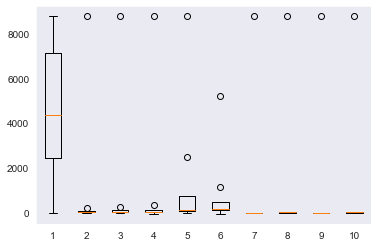

In [73]:

plt.boxplot(specific_data)

from above we can see approximately the min, max value of each year beside mean, median, and the standart deviation. the boxplot from number 2 -6 are for annual cost 2018-2022.

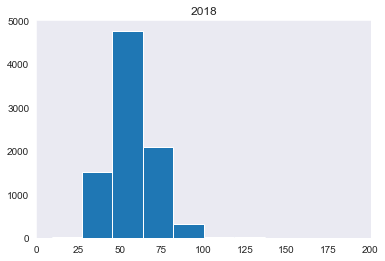

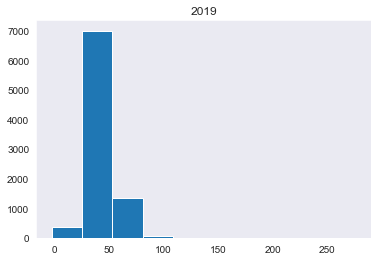

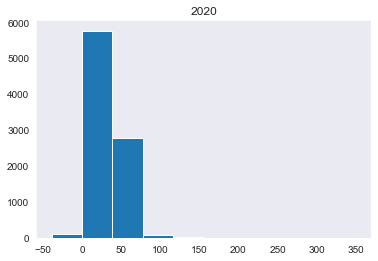

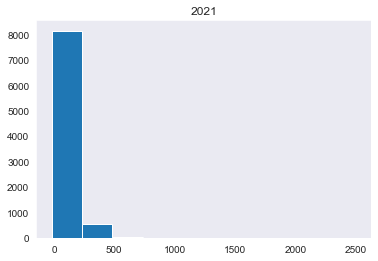

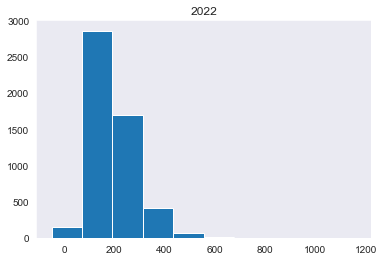

In [74]:
# look at numeric and categorical values separately 
df_num = data_set[['2018','2019','2020','2021','2022']]
df_cat = data_set[['start_month','start_day','end_month','end_day']]

#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

          2018      2019      2020      2021      2022
2018  1.000000  0.184446  0.536832  0.435855  0.352806
2019  0.184446  1.000000  0.211191  0.032654  0.126696
2020  0.536832  0.211191  1.000000  0.513740  0.341047
2021  0.435855  0.032654  0.513740  1.000000  0.295141
2022  0.352806  0.126696  0.341047  0.295141  1.000000


<AxesSubplot:>

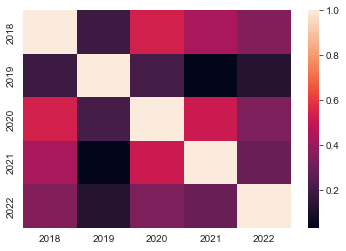

In [75]:
# check the coleration relationship data for each year annual cost use heatmap to understand more the electricity cost
print(df_num.corr())
sns.heatmap(df_num.corr())

#data visualisation

Text(0, 0.5, 'year')

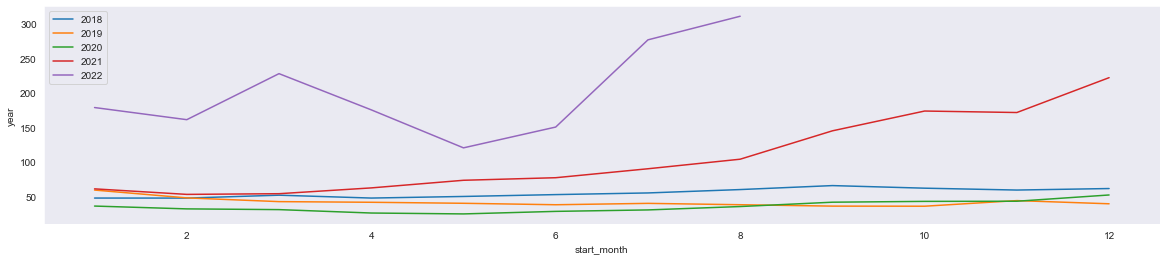

In [76]:
#Create grouping our dataset used monthly as index
DM = data_set.groupby(['start_month']).median()
DM
# Create the line graph each year to 
fig, ax = plt.subplots(figsize=(20,4))
X = DM.index.values
#create loop for iterate
dict = ['2018','2019','2020','2021','2022']
for year in dict:
    #print (year)
    Y = DM[year]
    ax.plot(X, Y, label = year)

ax.legend()
ax.set_xlabel("start_month")
ax.set_ylabel("year")

Text(0, 0.5, 'year')

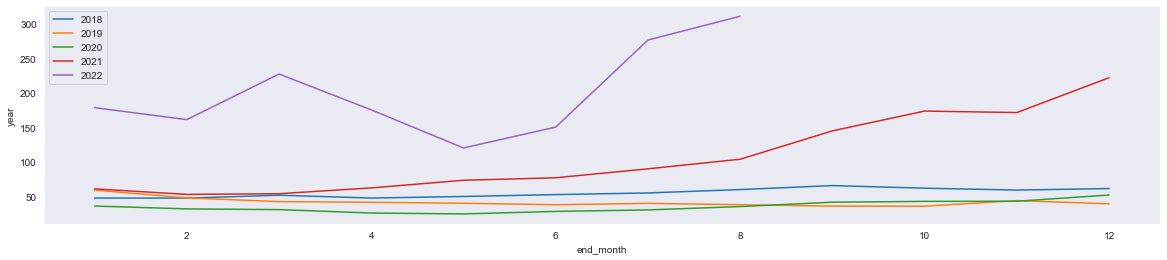

In [77]:
#Create grouping our dataset used monthly as index
DM1 = data_set.groupby(['end_month']).median()
DM1
# Create the line graph each year to 
fig, ax = plt.subplots(figsize=(20,4))
X = DM1.index.values
#create loop for iterate
dict = ['2018','2019','2020','2021','2022']
for year in dict:
    #print (year)
    Y = DM1[year]
    ax.plot(X, Y, label = year)

ax.legend()
ax.set_xlabel("end_month")
ax.set_ylabel("year")

as we can predict that winter season are the peak season and summer are the low season. however from those graph we can see that year 2019 and 2020 the wholesale price of electricity for UK lower than price on 2018. If i search from news etc the reason are the .......

and from 2021 until today the cost keep increase due to shortage supply as war between ukraine and rusia start from ......

Text(0, 0.5, 'year')

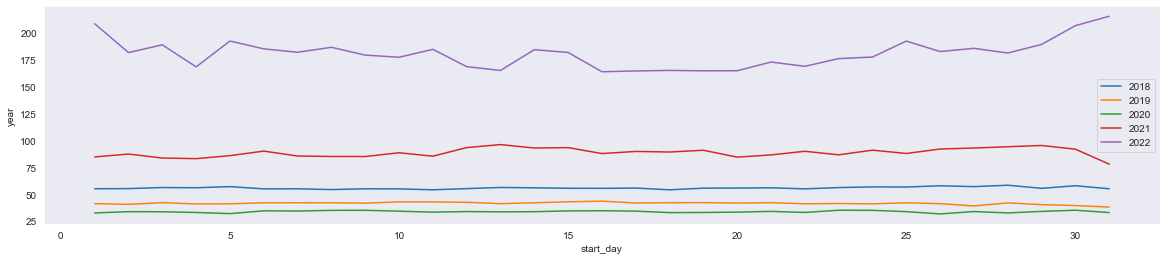

In [78]:
#Create grouping our dataset used daily as index
DD = data_set.groupby(['start_day']).median()
DD
# Create the line graph each year to 
fig, ax = plt.subplots(figsize=(20,4))
X = DD.index.values
#create loop for iterate
dict = ['2018','2019','2020','2021','2022']
for year in dict:
    #print (year)
    Y = DD[year]
    ax.plot(X, Y, label = year)

ax.legend()
ax.set_xlabel("start_day")
ax.set_ylabel("year")

Text(0, 0.5, 'year')

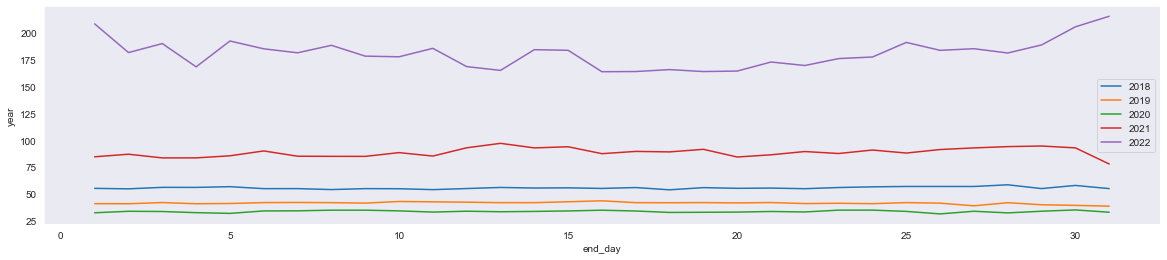

In [79]:
#Create grouping our dataset used daily as index
DD1 = data_set.groupby(['end_day']).median()
DD1
# Create the line graph each year to 
fig, ax = plt.subplots(figsize=(20,4))
X = DD1.index.values
#create loop for iterate
dict = ['2018','2019','2020','2021','2022']
for year in dict:
    #print (year)
    Y = DD1[year]
    ax.plot(X, Y, label = year)

ax.legend()
ax.set_xlabel("end_day")
ax.set_ylabel("year")

Text(0, 0.5, 'year')

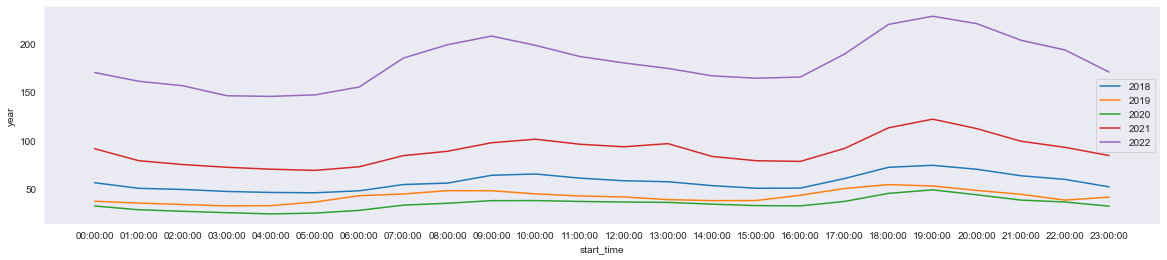

In [80]:
#Create grouping our dataset used hourly as index
DT = data_set.groupby(['start_time']).median()

# Create the line graph each year to 
fig, ax = plt.subplots(figsize=(20,4))
#DT['start_time'] = 
#DT.dtypes
X = DT.index.values.astype(str)
#create loop for iterate
dict = ['2018','2019','2020','2021','2022']
for year in dict:
    #print (year)
    Y = DT[year]
    ax.plot(X, Y, label = year)

ax.legend()
ax.set_xlabel("start_time")
ax.set_ylabel("year")


Text(0, 0.5, 'year')

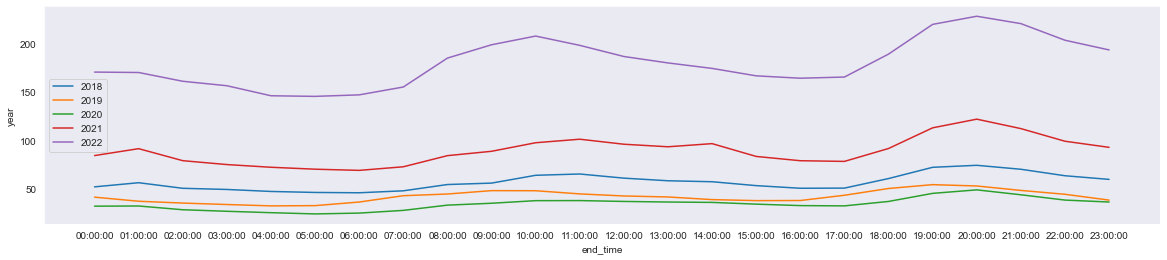

In [81]:
#Create grouping our dataset used hourly as index
DT1 = data_set.groupby(['end_time']).median()
DT1
# Create the line graph each year to 
fig, ax = plt.subplots(figsize=(20,4))
#DT['start_time'] = 
#DT.dtypes
X = DT1.index.values.astype(str)
#create loop for iterate
dict = ['2018','2019','2020','2021','2022']
for year in dict:
    #print (year)
    Y = DT1[year]
    ax.plot(X, Y, label = year)

ax.legend()
ax.set_xlabel("end_time")
ax.set_ylabel("year")

from above we can see that the peak hour happen twice a day which are around 10am - 1 pm and in the evening the peak at 7pm.

In [82]:
# compare monthly cost for each year from 2018 to 2022
pd.pivot_table(data_set, index = 'start_month', values = ['2018','2019','2020','2021','2022'])

,2018,2019,2020,2021,2022
start_month,,,,,
1,49.803616,60.824852,35.721371,80.258978,182.798226
2,51.147545,50.173110,30.668051,54.415372,161.939568
3,57.031673,44.294328,31.646707,57.043069,250.409677
4,50.701889,43.585431,24.177653,66.360083,176.780000
5,53.290565,41.357769,22.167433,74.394892,124.813844
6,53.944917,39.691417,26.487028,78.237931,159.545250
7,56.874153,41.066761,29.446452,93.516613,285.815390
8,60.585591,38.141062,36.276882,106.833038,314.296750
9,66.473986,36.196444,43.779861,189.114431,NaN


In [83]:
# compare hourly cost for each year from 2018 to 2022
pd.pivot_table(data_set, index = 'start_time', values = ['2018','2019','2020','2021','2022'])

,2018,2019,2020,2021,2022
start_time,,,,,
00:00:00,56.013014,37.905397,32.206301,105.210356,187.660369
01:00:00,51.672986,36.354603,28.381096,96.093836,174.627972
02:00:00,50.241192,33.796274,26.618329,93.634505,170.488565
03:00:00,47.687205,32.175890,24.343205,87.660795,160.707558
04:00:00,45.945726,32.169973,22.730356,82.621863,154.280230
05:00:00,45.493534,36.073288,23.219096,82.172055,154.984516
06:00:00,48.982000,42.303699,27.019288,90.598438,164.115714
07:00:00,55.522055,44.275671,32.972877,106.804548,192.953825
08:00:00,56.709260,47.818000,35.338658,111.977781,210.779631


In [84]:
# compare daily cost for each year from 2018 to 2022
pt =  pd.pivot_table(data_set, index = 'start_day', values = ['2018','2019','2020','2021','2022'])
pt

,2018,2019,2020,2021,2022
start_day,,,,,
1,58.388646,42.747847,34.124931,98.909583,204.864167
2,58.632847,42.941354,34.523576,119.248056,184.170677
3,58.447396,43.791806,35.330312,111.316528,193.478490
4,58.328229,43.162049,34.585556,100.883993,205.711458
5,57.759306,42.806563,32.656215,101.635660,215.985781
6,55.982014,43.330139,35.447708,119.047569,201.674881
7,55.986181,43.872917,36.722500,112.985694,206.124762
8,55.346215,43.694757,36.866528,110.117222,212.579107
9,56.464549,42.727326,38.458993,122.531424,198.203512


#Modelling

Because we want to predict the wholesale price of our electricity by using our current data as independent variables, therefore for first step modelling we choose linear regression as we have several input then the multiple linear regression

In [113]:
X = data_set.iloc[:, 1:5]

Y = data_set.iloc[:, 5]

X_train_df = data_set.iloc[0:5090, 1:5]
Y_train_df = data_set.iloc[0:5090, 5]

X_test_df = data_set.iloc[5090: , 1:5]
Y_test_df = data_set.iloc[5090:, 5]

# Scaling the dataset
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_df)
X_test_std = sc.transform(X_test_df)

# Hyperparameters for GradientBoostingRegressor
#The hyperparameters used for training the models are the following:
#n_estimators: Number of trees used for boosting
#max_depth: Maximum depth of the tree
#learning_rate: Rate by which outcome from each tree will be scaled or shrinked
#loss: Loss function to optimize. The options for the loss functions are: ls, lad, huber, quantile. ls represents least square loss. lad represents least absolute deviation. huber represents combination of both, ls and lad.
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

# Create an instance of gradient boosting regressor
gbr = GradientBoostingRegressor(gbr_params)

# Fit the model
gbr.fit(X_train_std, Y_train_df)


TypeError: GradientBoostingRegressor.__init__() takes 1 positional argument but 2 were given

In [ ]:
print(Y)

In [111]:

X = data_set.iloc[:8760, 1:5]

Y = data_set.iloc[0:8760, 5]

X_train_df = data_set.iloc[0:5090, 1:5]
Y_train_df = data_set.iloc[0:5090, 5]

X_test_df = data_set.iloc[5090:8760 , 1:5]
Y_test_df = data_set.iloc[5090:8760, 5]


# Scaling the dataset
sc = StandardScaler()#create X & Y
#X = data_set.iloc[0:8760, 1:5]
#Y = data_set.iloc[0:8760, 5]

#Start to split the data between train and test manually because when we use the train_test_split keep giving some error due to Y axis has NAN
#train_df = data_set.iloc[0:5090 , 1:5].values.reshape(-1, 1)
#test_df = data_set.iloc[5090:8760, 5].values.reshape(-1, 1)


#Split the data set I choose 70 train and 30 for test
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)


# Scaling the dataset
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_df)
X_test_std = sc.transform(X_test_df)

# Hyperparameters for GradientBoostingRegressor
#The hyperparameters used for training the models are the following:
#n_estimators: Number of trees used for boosting
#max_depth: Maximum depth of the tree
#learning_rate: Rate by which outcome from each tree will be scaled or shrinked
#loss: Loss function to optimize. The options for the loss functions are: ls, lad, huber, quantile. ls represents least square loss. lad represents least absolute deviation. huber represents combination of both, ls and lad.
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

# Create an instance of gradient boosting regressor
gbr = HistGradientBoostingRegressor(gbr_params)

# Fit the model
gbr.fit(X_train_df,Y_train_df)




#initiate the model
#GBM = HistGradientBoostingRegressor(random_state=42)

#fit the model
#GBM.fit(X_train, Y_train)


ValueError: Input y contains NaN.

In [103]:
X = data_set.iloc[:8760, 1:5]

Y = data_set.iloc[0:8760, 5]

X_train_df = data_set.iloc[0:5090, 1:5]
Y_train_df = data_set.iloc[0:5090, 5]

X_test_df = data_set.iloc[5090:8760 , 1:5]
Y_test_df = data_set.iloc[5090:8760, 5]


# Scaling the dataset
sc = StandardScaler()


#We need to build OLS(Ordinary Least Squares) Prediction
#Create linear regresion object
linear_regressor = LinearRegression()
#Perform linear regression
linear_regressor.fit(X_train_df,Y_train_df)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#create X & Y
X = df.iloc[:, 1:5]
Y = df.iloc[:, 5]

#Start to split the data between train and test manually because when we use the train_test_split keep giving some error due to Y axis has NAN
train_df = df.iloc[:5090 , 1:5].values.reshape(-1, 1)
test_df = df.iloc[5090: , 5].values.reshape(-1, 1)


#Split the data set I choose 70 train and 30 for test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)


# Scaling the dataset
sc = StandardScaler()


#We need to build OLS(Ordinary Least Squares) Prediction
#Create linear regresion object
linear_regressor = LinearRegression()
#Perform linear regression
linear_regressor.fit(X_train,Y_train)

#Make the actual predictons
#Y_pred = linear_regressor.predict(X_test)

#print just to double check if the correct data showed that we want to have it.
#Y_pred

#Plotting data and predicted variable
#make scatter plot using our data 
#plt.scatter(X_train,Y_train)
#plt.plot(X_test, Y_pred, color='red')
#plt.xlabel("Actual Departure")
#plt.ylabel("Schedule Departure")
#plt.show()

ValueError: Input y contains NaN.